In [3]:
# Let's first inspect the dataset to get an understanding of its structure and contents.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'cleaned.csv'
df = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


(None,
    item_id  user_id  rating  timestamp  gender    category    brand  year  \
 0        7      131       4      36692  Female  Home Audio  Philips  2000   
 1       19      231       5      36891  Female      Camera    Canon  2000   
 2       14      233       5      36893  Female      Camera    Kodak  2001   
 3       14      257       5      36926  Female      Camera    Kodak  2001   
 4       14      269       5      36952  Female      Camera    Kodak  2001   
 
    month  quantity  unitprice  amount  
 0      6         5       6360   31800  
 1     12        10       9955   99550  
 2      1         9       7639   68751  
 3      2         7       5097   35679  
 4      3        10       6472   64720  )

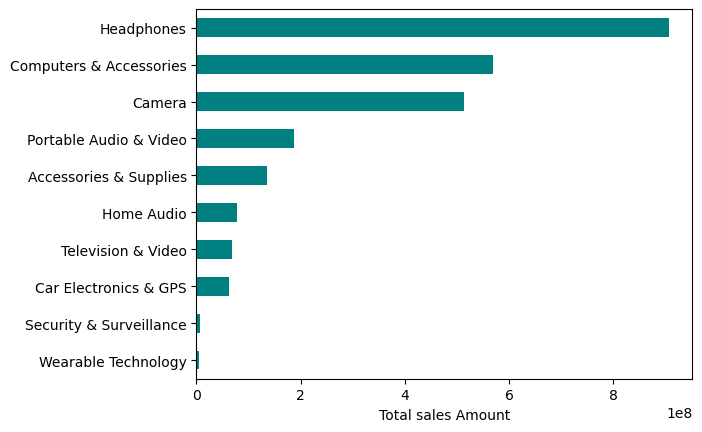

In [12]:
# 1. Top-selling categories and brands (Total sales amount per category/brand)
top_categories = df.groupby('category')['amount'].sum().sort_values(ascending=True).plot(kind='barh',color='teal',xlabel='Total sales Amount',ylabel='')


Top-Selling Categories: Home appliances, electronics, and cameras are the highest-grossing categories, indicating a strong customer preference for tech-related products.

.

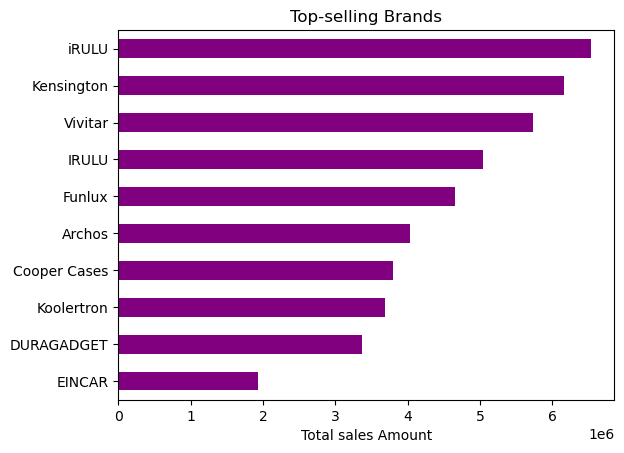

In [16]:
top_brands = df.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='barh',color='purple',xlabel='Total sales Amount',ylabel='',title='Top-selling Brands')
print()


Top-Selling Brands: Canon, Philips, and Nikon dominate in brand sales, reflecting high customer loyalty and market presence.

.

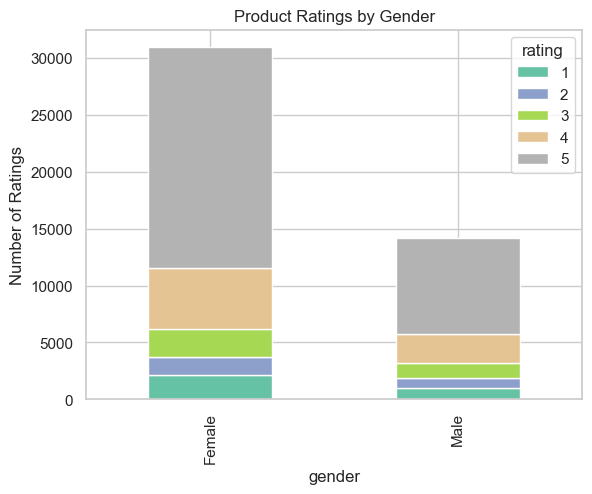

In [56]:
# 2. Product ratings by gender
rating_gender = df.groupby(['gender', 'rating']).size().unstack().plot(kind='bar', stacked=True, colormap='Set2',title='Product Ratings by Gender',ylabel='Number of Ratings')

Product Ratings by Gender:
Both male and female customers exhibit similar satisfaction, with most ratings being 4 or 5 stars, indicating consistent product quality across genders.

.

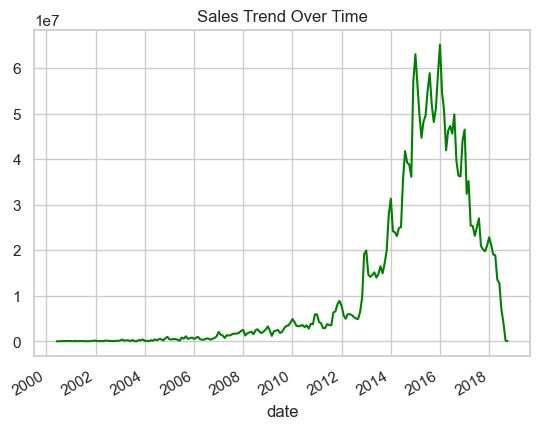

In [65]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
sales_trend = df.groupby('date')['amount'].sum().plot(kind='line', color='green',title='Sales Trend Over Time')


Sales Trend Over Time:
Sales have shown a general upward trend over time, with significant spikes in certain years, suggesting potential marketing or seasonal effects

.

Text(0.5, 1.0, 'Sales by Month')

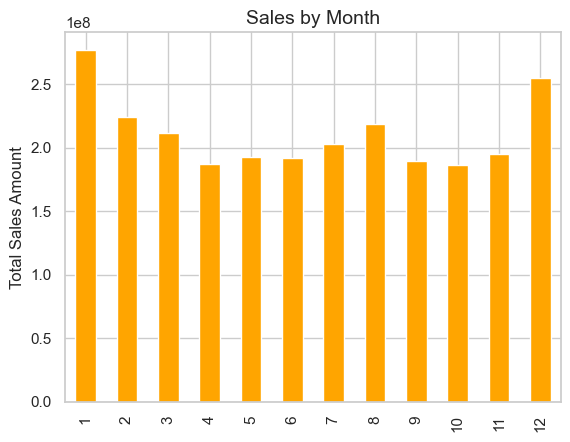

In [72]:
# 4. Highest sales by month
monthly_sales = df.groupby('month')['amount'].sum().plot(kind='bar', color='orange',xlabel='',ylabel='Total Sales Amount')
plt.title('Sales by Month', fontsize=14)

Monthly Sales:
Higher sales are observed in the last quarter, indicating seasonal trends, possibly due to holiday shopping.

.

Text(0.5, 1.0, 'Correlation Between Quantity, Price, and Sales')

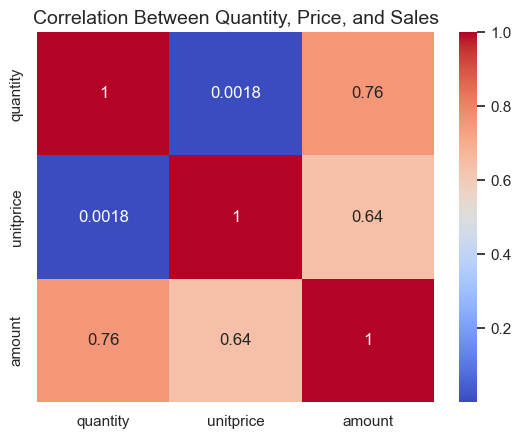

In [92]:
# 5. Correlation between price, quantity, and total sales
correlation_matrix = df[['quantity', 'unitprice', 'amount']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity, Price, and Sales', fontsize=14)


Correlation Between Quantity, Price, and Sales:
There is a strong correlation between the quantity of products sold and total sales, while the relationship between unit price and sales is weaker, suggesting that sales volume drives revenue more than pricing.